In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Read text file into a variable called grid
grid = gpd.read_file('data/MetropAccess_YKR_grid_EurefFIN.shp')

# Check the data
grid

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."
...,...,...,...,...
13226,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6..."
13227,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6..."
13228,372375.0,6665380.0,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6..."
13229,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6..."


In [2]:
# Read the travel time data file for Forum
data = pd.read_csv('data/TravelTimes_to_5975373_Forum.txt', sep=';') 

# Select only needed columns
data = data[['car_r_t', 'from_id', 'to_id']]

In [3]:
# Join attributes from data to grid
data_geo = grid.merge(data, on=[grid['YKR_ID'], data['from_id']], how="left")

In [4]:
# Remove no data values
data_geo[data_geo==-1]=np.nan
data_geo.dropna(inplace=True)

In [5]:
import mapclassify

# Create a UserDefines Classifier
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
classifier = mapclassify.UserDefined.make(bins)

# Classify the data
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)

# Check the data
data_geo

,key_0,key_1,x,y,YKR_ID,geometry,car_r_t,from_id,to_id,car_r_t_cl
0,5785640,5785640,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",49.0,5785640,5975373.0,9
1,5785641,5785641,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",49.0,5785641,5975373.0,9
2,5785642,5785642,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",57.0,5785642,5975373.0,11
3,5785643,5785643,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",60.0,5785643,5975373.0,11
4,5787544,5787544,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",48.0,5787544,5975373.0,9
...,...,...,...,...,...,...,...,...,...,...
13225,6016697,6016697,372625.0,6665630.0,6016697,"POLYGON ((372750.000 6665500.000, 372500.000 6...",46.0,6016697,5975373.0,9
13226,6016698,6016698,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",48.0,6016698,5975373.0,9
13227,6016699,6016699,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",50.0,6016699,5975373.0,9
13229,6018253,6018253,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",49.0,6018253,5975373.0,9


In [6]:
fp = 'data/shopping_centers.txt'
data_forum = pd.read_csv(fp, sep=';') 

from geopandas.tools import geocode

data_forum = data_forum.iloc[1]

# Geocode the addresses using Nominatim
geo = geocode(data_forum['ADDRESS'], provider='nominatim', user_agent='autogis_CM', timeout=10)

In [7]:
geo

,geometry,address
0,POINT (24.93858 60.16893),"Apollo Street Bar, 20, Mannerheimintie, Keskus..."


In [8]:
roads_fp = "data/roads.shp"
roads = gpd.read_file(roads_fp)

In [9]:
# Check the crs of each layer
print(roads.crs)
print(grid.crs)
print(geo.crs)

epsg:2392
epsg:3067
EPSG:4326


In [10]:
# Reproject geometries to ETRS89 / TM35FIN based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
geo = geo.to_crs(crs=grid.crs)

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 8
  Warn("Warning: setting k to %d" % k_q, UserWarning)


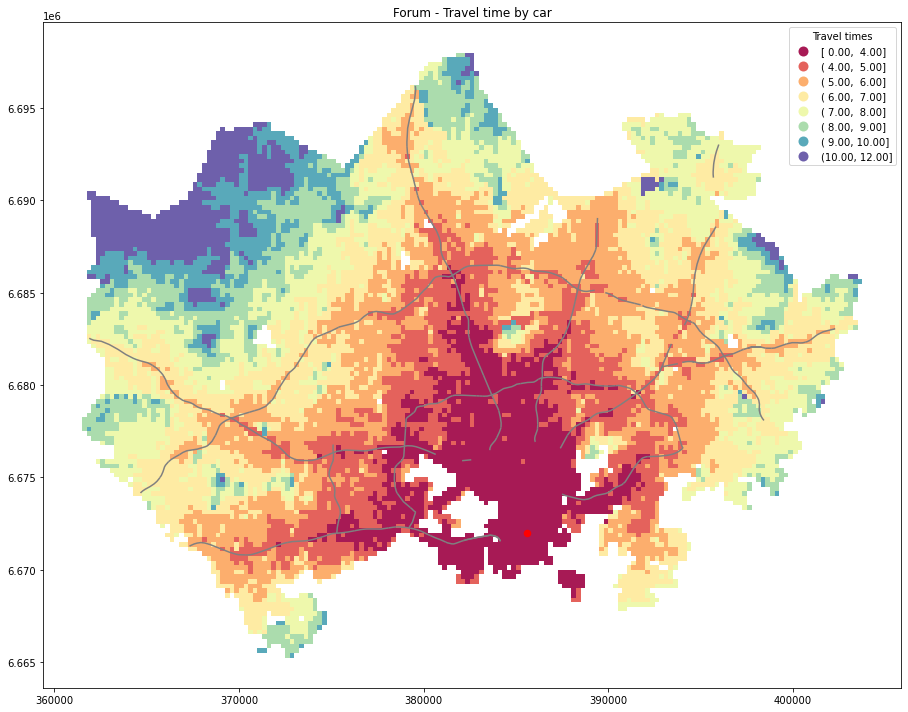

In [15]:
fig, ax = plt.subplots(figsize=(16,10))

# Visualize the travel times 
data_geo.plot(ax=ax, column='car_r_t_cl', linewidth=0.03, cmap="Spectral", scheme="quantiles", k=12, alpha=0.9, legend=True)

ax.set_title("Forum - Travel time by car")

# Set a title for the legend
ax.get_legend().set_title("Travel times")


# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

geo.plot(ax=ax, color="red", linewidth=1.5)

# Remove the empty white-space around the axes
plt.tight_layout()

In [16]:
outfp = "docs/forum_accessibility.png"
plt.savefig(outfp, dpi=300)

<Figure size 432x288 with 0 Axes>